<a href="https://colab.research.google.com/github/ThugCodeNinja/LGMVIP--DataScience/blob/main/Stock_prediction_and_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

In [29]:
Da='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df= pd.read_csv(Da, parse_dates=True,)
df.reset_index()
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [31]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [33]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [34]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [35]:
df.drop_duplicates()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


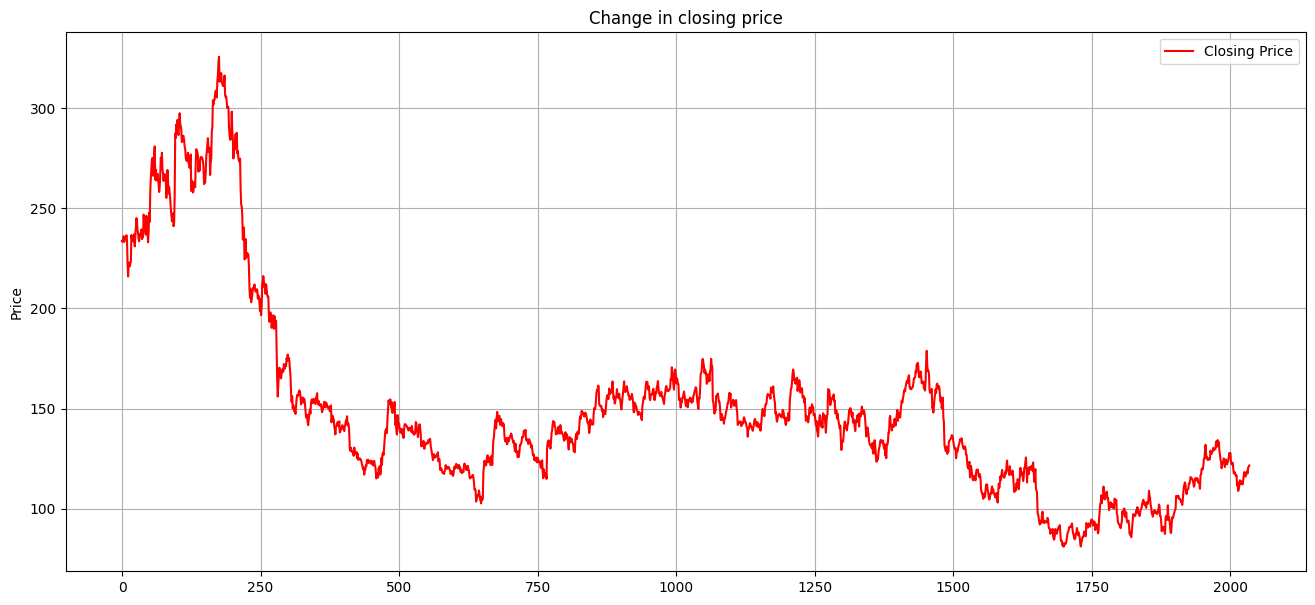

In [36]:
plt.figure(figsize=(10,6))
df['Close'].plot(kind='line',figsize=(16,7),color='r',label="Closing Price")
plt.ylabel("Price")
plt.legend(loc="upper right")
plt.title("Change in closing price")
plt.grid()

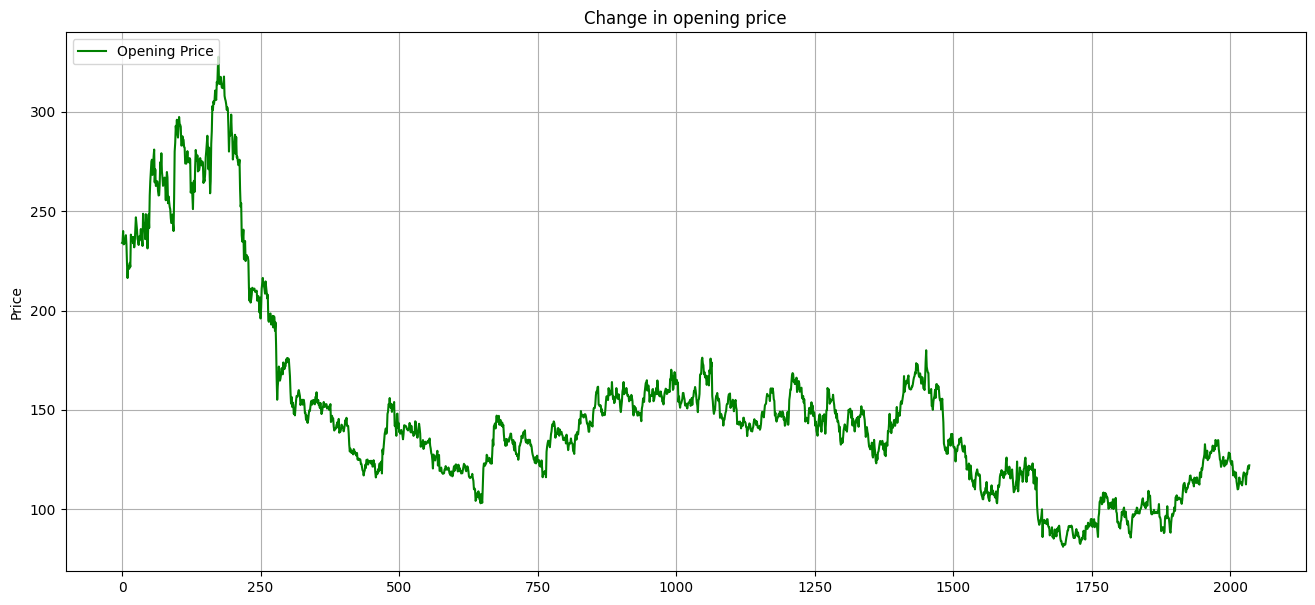

In [37]:
plt.figure(figsize=(10,6))
df['Open'].plot(kind='line',figsize=(16,7),color='g',label="Opening Price")
plt.ylabel("Price")
plt.legend(loc="upper left")
plt.title("Change in opening price")
plt.grid()

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64


<Axes: >

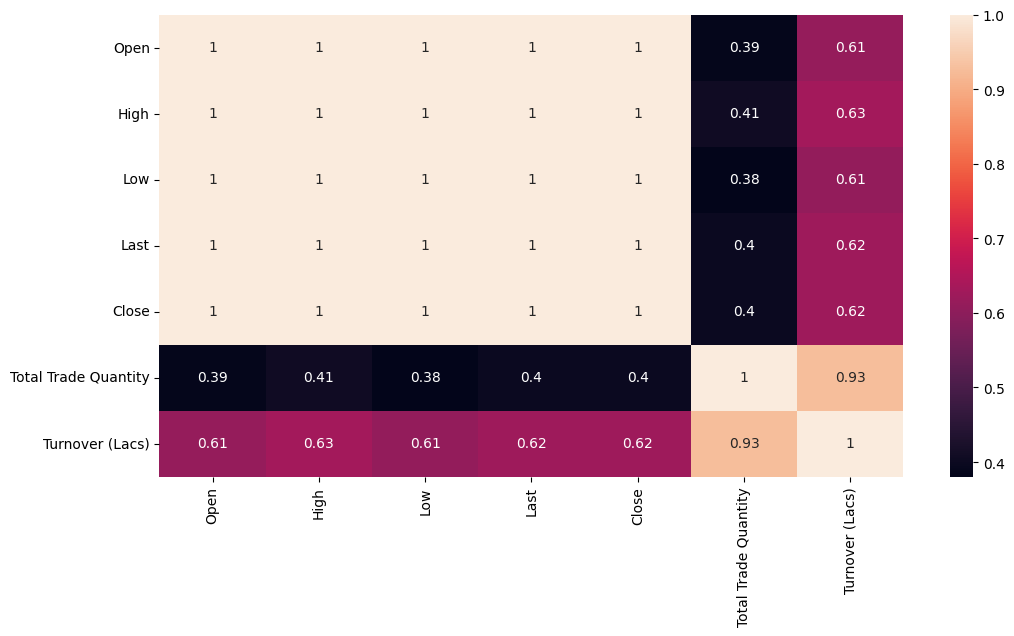

In [38]:
df1=df.reset_index()['Close']
print(df1)
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [39]:
training_set= df[['High']]
training_set=pd.DataFrame(training_set)
training_set


,High
0,235.95
1,236.80
2,240.00
3,236.75
4,239.20
...,...
2030,119.50
2031,121.00
2032,121.95
2033,122.00


In [40]:
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaler=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(training_set_scaler)

train_size1= int(len(training_set_scaler)*0.65)
test_size1=int(len(training_set_scaler))-train_size1
train_data1,test_data1=training_set_scaler[0:train_size1,:],training_set_scaler[train_size1:len(df),:1]

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [41]:
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step=100
x_train, y_train=create_dataset(train_data1, time_step)
x_test, y_test= create_dataset(test_data1, time_step)
print(x_train.shape,y_train.shape)

(1221, 100) (1221,)


In [42]:
print(x_test.shape)
print(y_test.shape)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)


(612, 100)
(612,)


In [43]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics='acc')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 75, batch_size = 64, verbose = 1)

Epoch 1/75
20/20 [==============================] - 6s 75ms/step - loss: 0.0190 - acc: 8.1900e-04 - val_loss: 0.0060 - val_acc: 0.0016
Epoch 2/75
20/20 [==============================] - 0s 17ms/step - loss: 0.0025 - acc: 8.1900e-04 - val_loss: 6.9860e-04 - val_acc: 0.0016
Epoch 3/75
20/20 [==============================] - 0s 16ms/step - loss: 0.0019 - acc: 8.1900e-04 - val_loss: 0.0013 - val_acc: 0.0016
Epoch 4/75
20/20 [==============================] - 0s 17ms/step - loss: 0.0015 - acc: 8.1900e-04 - val_loss: 7.3190e-04 - val_acc: 0.0016
Epoch 5/75
20/20 [==============================] - 0s 17ms/step - loss: 0.0014 - acc: 8.1900e-04 - val_loss: 8.8035e-04 - val_acc: 0.0016
Epoch 6/75
20/20 [==============================] - 0s 17ms/step - loss: 0.0013 - acc: 8.1900e-04 - val_loss: 7.5933e-04 - val_acc: 0.0016
Epoch 7/75
20/20 [==============================] - 0s 17ms/step - loss: 0.0015 - acc: 8.1900e-04 - val_loss: 7.3617e-04 - val_acc: 0.0016
Epoch 8/75
20/20 [=================

In [45]:
train_predict1=model.predict(x_train)
test_predict1=model.predict(x_test)
#Transformback to original form
train_predict1=scaler.inverse_transform(train_predict1)
test_predict1=scaler.inverse_transform(test_predict1)
print(math.sqrt(mean_squared_error(y_train,train_predict1)))
print(math.sqrt(mean_squared_error(y_test,test_predict1)))

20/20 [==============================] - 0s 9ms/step
167.5439676732595
116.94641536849973


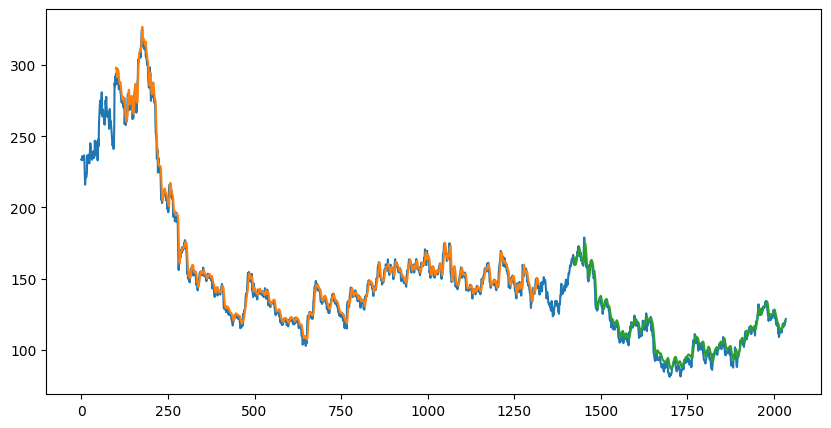

In [46]:
look_back=100
trainPredictPlot = np.empty_like(training_set_scaler)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict1)+look_back, :] = train_predict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(training_set_scaler)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict1)+(look_back*2)+1:len(df1)-1, :] = test_predict1

# plot baseline and predictions
plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(training_set_scaler))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()